# Ερωτηση 3
### Β)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
import datetime as datetime
import seaborn as sns
import scipy as sp 
from scipy import stats
from math import floor

In [2]:
df_bus = pd.read_csv("business.csv") # Businesses Dataframe
df_rev = pd.read_csv('reviews.csv') # Reviews Dataframe

In [3]:
df_rev = df_rev.sort_values(by = 'date')
# df_rev.date = df_rev.date.apply(lambda d: pd.to_datetime(d[0:10]))


Σε αυτο το σημειο, εχουμε ολες τις ημερομηνιες που εγιναν τα reviews, ταξινομημενα, κρατωντας τον χρονο, μηνα και ημερα που εγινε το review.

In [4]:
df_first_revs = df_rev.groupby('business_id', as_index=False).first()

In [5]:
df_first_revs = df_first_revs[["business_id","date"]]

In [6]:
print(len(df_first_revs), len(df_bus))

11070 11070


In [7]:
df_first_revs.rename(columns = {"date":"first_date"}, inplace=True)
df_first_revs.head()

,business_id,first_date
0,--OS_I7dnABrXvRCCuWOGQ,2016-01-18 15:35:18
1,-0M0b-XhtFagyLmsBtOe8w,2012-02-10 04:00:49
2,-0PN_KFPtbnLQZEeb23XiA,2009-10-16 15:24:48
3,-0TffRSXXIlBYVbb5AwfTg,2013-06-01 01:47:50
4,-0eUa8TsXFFy0FCxHYmrjg,2015-10-20 18:20:03


In [8]:
df_rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
621505,g80vzN72iU03Wh0fSpq41g,3zBJUlWtPNoZ0uN83ODbyg,PP3BBaVxZLcJU54uP_wL6Q,5.0,0,0,0,These guys really are the king of cheese steak...,2005-02-16 04:06:26
278520,DTrvaOwqev-xhbqqblt7Tw,H4JNrBAoyCk_ZMZWbAf8OA,Co3Ogqy6y2JgZdG0wBlrUQ,5.0,0,0,4,THIS IS MY FAVORITE BAR IN PHILADELPHIA. Oh T...,2005-05-25 01:12:54
186958,J3Jk5A1TnFeKf2SGNrZLrw,c8qFkI_VusWo0xZvkjfBWQ,RQAF6a0akMiot5lZZnMNNw,5.0,2,1,1,I lost a bet during undergrad at Carnegie Mell...,2005-05-26 04:09:08
277819,VT5V1Exe7LfzsnJ2XjMAPQ,c8qFkI_VusWo0xZvkjfBWQ,IkY2ticzHEn4QFn8hQLSWg,5.0,2,1,1,"Geno's is superb, arguably the best in town. ...",2005-05-26 04:20:21
622678,fMBtLRIO1iNnU0bloDlFcg,c8qFkI_VusWo0xZvkjfBWQ,PP3BBaVxZLcJU54uP_wL6Q,4.0,0,0,0,If you're in Philly you either love Pat's or G...,2005-05-26 04:28:58


In [9]:
df_rev = df_rev.merge(df_first_revs, on="business_id")

df_rev = df_rev[["review_id", "business_id", "stars", "date", "first_date"]]

In [10]:
df_rev.shape

(881973, 5)

Το παρακατω θελει περιπου 50s για να τρεξει αφου καλει ενα function σε 881973 γραμμες, που χρησιμοποιει δυο στηλες και εχει μετατροπες ημερων. 

In [11]:
df_rev["month"] = df_rev.apply(lambda row: floor(int((datetime.datetime.strptime(row.date, '%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row.first_date, '%Y-%m-%d %H:%M:%S')).days) / 30), axis=1)
df_rev.shape
df_rev.head()

,review_id,business_id,stars,date,first_date,month
0,g80vzN72iU03Wh0fSpq41g,PP3BBaVxZLcJU54uP_wL6Q,5.0,2005-02-16 04:06:26,2005-02-16 04:06:26,0
1,fMBtLRIO1iNnU0bloDlFcg,PP3BBaVxZLcJU54uP_wL6Q,4.0,2005-05-26 04:28:58,2005-02-16 04:06:26,3
2,4sx5920CvYkvyupjeYxh0Q,PP3BBaVxZLcJU54uP_wL6Q,4.0,2005-10-30 02:44:52,2005-02-16 04:06:26,8
3,afVwJgO8FuEZjKM0JsgX1A,PP3BBaVxZLcJU54uP_wL6Q,5.0,2006-02-03 22:57:31,2005-02-16 04:06:26,11
4,BIYFISioE0g8UKXY161LmA,PP3BBaVxZLcJU54uP_wL6Q,4.0,2006-02-20 05:00:25,2005-02-16 04:06:26,12


Με αυτον τον τροπο εχουμε στην στηλη month, σε καθε review, τους μηνες που περασαν απο το πρωτο review(σε εκεινο το καταστημα). 

<AxesSubplot:xlabel='month', ylabel='stars'>

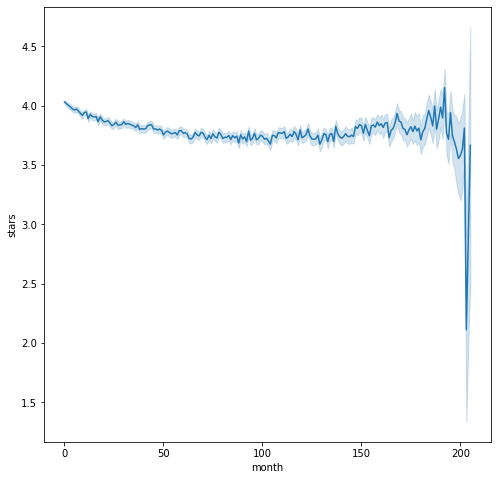

In [12]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=df_rev, x = "month", y = "stars")

Μπορούμε να παρατηρήσουμε ότι τα αστέρια των reviews, μέχρι τους 150 μήνες δείχνουν μια χαμηλή πτωτική πορεία, αλλά διατηρούν σχετικά σταθερές τιμές. Από τους 150 μήνες και έπειτα, τα αστέρια φαίνεται να έχουν μεγάλες διαφορές στις τιμές τους και αυτό μπορεί να οφείλεται στην έλλειψη reviews που απέχουν τόσους μήνες από το πρώτο review τους(αφού περίπου τα μισά reviews αφορούν τους πρώτους 60 μήνες).

In [13]:
df_rev_5_years = df_rev.loc[df_rev.month <= 60]
df_rev_5_years.shape

(488360, 6)

<AxesSubplot:xlabel='month', ylabel='stars'>

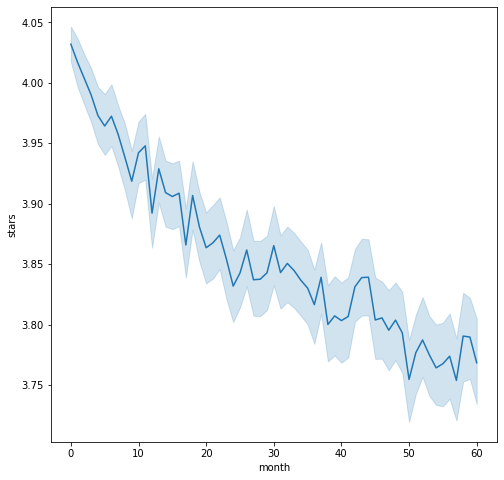

In [14]:
plt.figure(figsize=(8, 8))
sns.lineplot(data = df_rev_5_years, x = "month", y = "stars", ci=95)

## Τελικά Συμπεράσματα
Σε αυτό το διάγραμμα μπορούμε να παρατηρήσουμε, πιο ξεκάθαρα από το πρώτο διάγραμμα, από τα πρώτα reviews μέχρι τα reviews που απέχουν 60 μήνες, μια πτωτική τάση για περίπου 0.3 αστέρια. Αυτό μπορεί να οφείλεται στο γεγονός ότι τα καταστήματα γίνονται χειροτέρα στις υπηρεσίες τους με την πάροδο του χρόνου ή πως με την πάροδο του χρόνου ο ενθουσιασμός για ένα κατάστημα πέφτει. 